### 1. Load molecule

In [1]:
from qdk.chemistry import Molecule

In [2]:
caffeine = Molecule.from_xyz("data/xyz/caffeine.xyz")

In [3]:
caffeine

JsmolWidget(layout=Layout(align_self='stretch', height='400px'))

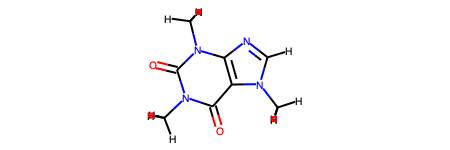

In [4]:
caffeine.mol

In [5]:
caffeine.num_electrons

102

### 2. Load Broombridge and simulate in Q#

In [6]:
import qsharp

Preparing Q# environment...
.....

In [7]:
from qdk.chemistry.broombridge import load_and_encode

Adding package microsoft.quantum.chemistry.jupyter.

In [9]:
qsharp.reload()

Reloading workspace.

In [10]:
from Microsoft.Quantum.Chemistry.Trotterization import GetEnergyByTrotterization

### Simulate energy of Caffeine molecule

In [11]:
encoded_data_caffeine = load_and_encode("data/broombridge/caffeine.yaml")

In [12]:
%%time
GetEnergyByTrotterization.simulate(
    JWEncodedData=encoded_data_caffeine,
    nBitsPrecision=7,
    trotterStepSize=0.4,
    trotterOrder=1)

CPU times: user 4.17 ms, sys: 5.39 ms, total: 9.56 ms
Wall time: 1.25 s


(0.2086213871524472, 883.8593615161756)

In [13]:
%%time
GetEnergyByTrotterization.estimate_resources(
    JWEncodedData=encoded_data_caffeine, 
    nBitsPrecision=7,
    trotterStepSize=0.4, 
    trotterOrder=1)

CPU times: user 4.52 ms, sys: 5.52 ms, total: 10 ms
Wall time: 1.82 s


{'CNOT': 211616,
 'QubitClifford': 124794,
 'R': 81068,
 'Measure': 317,
 'T': 0,
 'Depth': 0,
 'Width': 5,
 'QubitCount': 5,
 'BorrowedWidth': 0}

In [14]:
from Microsoft.Quantum.Chemistry.VQE import GetEnergyVQE

In [15]:
GetEnergyVQE.estimate_resources(
    JWEncodedData=encoded_data_caffeine,
    theta1=0.001,
    theta2=-0.001,
    theta3=0.001,
    nSamples=1
)

{'CNOT': 0,
 'QubitClifford': 52,
 'R': 0,
 'Measure': 130,
 'T': 0,
 'Depth': 0,
 'Width': 4,
 'QubitCount': 4,
 'BorrowedWidth': 0}

### H2

In [31]:
H2 = Molecule.from_smiles("[H][H]")

Solution did not converge. Lowest energy found: -1.0


In [32]:
H2

JsmolWidget(layout=Layout(align_self='stretch', height='400px'))

In [33]:
H2.num_electrons

2

In [16]:
encoded_data_h2 = load_and_encode("data/broombridge/hydrogen_0.2.yaml")

In [17]:
%%time
GetEnergyByTrotterization.simulate(
    JWEncodedData=encoded_data_h2, 
    nBitsPrecision=7,
    trotterStepSize=0.4,
    trotterOrder=1)

CPU times: user 3.63 ms, sys: 3.55 ms, total: 7.18 ms
Wall time: 344 ms


(-0.4099982804142568, -1.1238301470356422)

In [18]:
GetEnergyVQE.estimate_resources(
    JWEncodedData=encoded_data_h2,
    theta1=0.001,
    theta2=-0.001,
    theta3=0.001,
    nSamples=1
)

{'CNOT': 0,
 'QubitClifford': 28,
 'R': 0,
 'Measure': 70,
 'T': 0,
 'Depth': 0,
 'Width': 4,
 'QubitCount': 4,
 'BorrowedWidth': 0}

### Approximate H2 molecule, evaluate Hamiltonian term by term

In [19]:
from Microsoft.Quantum.Chemistry.Hamiltonian import GetHamiltonianTermH2

In [29]:
GetHamiltonianTermH2.estimate_resources(
    nOp=11
)

{'CNOT': 4,
 'QubitClifford': 12,
 'R': 0,
 'Measure': 5,
 'T': 0,
 'Depth': 0,
 'Width': 5,
 'QubitCount': 5,
 'BorrowedWidth': 0}

In [34]:
import qsharp.azure

In [35]:
rid = ""

In [36]:
qsharp.azure.connect(
   resourceId=rid,
   location="West US")
qsharp.azure.target("ionq.simulator")

Connected to Azure Quantum workspace TestGuen in location westus.
Loading package Microsoft.Quantum.Providers.IonQ and dependencies...
Active target is now ionq.simulator


{'id': 'ionq.simulator', 'current_availability': 'Available', 'average_queue_time': 0}

In [38]:
n_op = 0
result = qsharp.azure.execute(GetHamiltonianTermH2, nOp=n_op, shots=1000, jobName=f"Hamiltonian term {n_op}")

Submitting Microsoft.Quantum.Chemistry.Hamiltonian.GetHamiltonianTermH2 to target ionq.simulator...


The Q# operation Microsoft.Quantum.Chemistry.Hamiltonian.GetHamiltonianTermH2 could not be compiled as an entry point for job execution.
/Users/guen/repos/microsoft/Quantum/samples/azure-quantum/chemistry/GetEnergyVQE.qs(24,16): error QS5027: The callable EstimateEnergy requires the FullComputation runtime capability, which is not supported by the target ionq.simulator.
/Users/guen/repos/microsoft/Quantum/samples/azure-quantum/chemistry/GetEnergyByTrot.qs(22,33): error QS5027: The callable RobustPhaseEstimation requires the FullComputation runtime capability, which is not supported by the target ionq.simulator.
/Users/guen/repos/microsoft/Quantum/samples/azure-quantum/chemistry/GetEnergyByTrot.qs(21,25): error QS5027: The callable PrepareTrialState requires the FullComputation runtime capability, which is not supported by the target ionq.simulator.


AzureError: {'error_code': 1009, 'error_name': 'InvalidEntryPoint', 'error_description': 'The specified Q# operation cannot be used as an entry point for Azure Quantum job submission.'}

In [ ]:
result